In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import cv2

import os
import cv2
import numpy as np

folder_path = '/content/drive/MyDrive/Colab Notebooks/high'

image_arrays = []

image_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')])

for filename in image_files:

    image = cv2.imread(os.path.join(folder_path, filename))
    image_arrays.append(image)

image_arrays_np = np.array(image_arrays)

print(image_arrays_np.shape)

(485, 400, 600, 3)


In [5]:
#Checking shapes of all images

shapes = [img.shape for img in image_arrays]
unique_shapes = set(shapes)
print("Unique shapes of images:", unique_shapes)
if len(unique_shapes) == 1:
    image_arrays_np = np.array(image_arrays)
    print("Shape of the array:", image_arrays_np.shape)
else:
    print("Images have different shapes. Please resize or no")

Unique shapes of images: {(400, 600, 3)}
Shape of the array: (485, 400, 600, 3)


In [6]:

folder_path_2 = '/content/drive/MyDrive/Colab Notebooks/low'

# List to store the image arrays
noised_image = []
image_files_2 = sorted([f for f in os.listdir(folder_path_2) if f.endswith('.jpg') or f.endswith('.png')])
# Loop through all the image files in the folder
for filename in image_files_2:
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Add more extensions if needed
        image = cv2.imread(os.path.join(folder_path_2, filename))
        noised_image.append(image)

# Convert the list of arrays to a single numpy array
noised_arrays_np = np.array(noised_image)

# Check the shape of the numpy array
print("Shape of the array:", noised_arrays_np.shape)


Shape of the array: (485, 400, 600, 3)


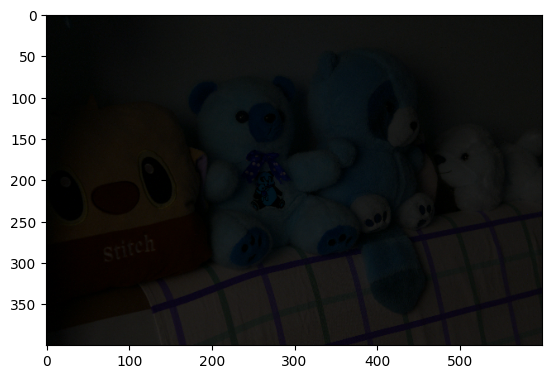

In [7]:
import matplotlib.pyplot as plt
plt.imshow(noised_arrays_np[0])

In [8]:
import cv2
# Define the new size
new_size = (200, 300)  # (width, height)

def resize_images(images, size):
    resized_images = []
    for image in images:
        resized_image = cv2.resize(image, size)
        resized_images.append(resized_image)
    return np.array(resized_images)

# Assuming noised_arrays_np and image_arrays_np are already defined as arrays of images
print("Original size of noised images:", noised_arrays_np.shape)
print("Original size of clean images:", image_arrays_np.shape)

# Resize the images
noised_arrays_np_resized = resize_images(noised_arrays_np, new_size)
image_arrays_np_resized = resize_images(image_arrays_np, new_size)

print("Resized size of noised images:", noised_arrays_np_resized.shape)
print("Resized size of clean images:", image_arrays_np_resized.shape)

Original size of noised images: (485, 400, 600, 3)
Original size of clean images: (485, 400, 600, 3)
Resized size of noised images: (485, 300, 200, 3)
Resized size of clean images: (485, 300, 200, 3)


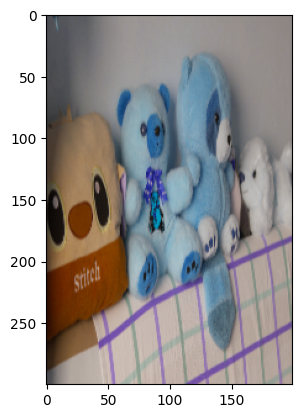

In [9]:
import matplotlib.pyplot as plt
plt.imshow(image_arrays_np_resized[0])

array([[[ 79,  81,  87],
        [ 79,  80,  86],
        [ 79,  80,  85],
        ...,
        [139, 135, 132],
        [139, 133, 132],
        [138, 132, 132]],

       [[ 80,  79,  86],
        [ 80,  80,  87],
        [ 79,  80,  85],
        ...,
        [139, 133, 133],
        [140, 133, 131],
        [139, 133, 132]],

       [[ 77,  80,  84],
        [ 76,  79,  84],
        [ 77,  77,  84],
        ...,
        [139, 134, 135],
        [139, 132, 130],
        [138, 133, 132]],

       ...,

       [[ 70,  70,  75],
        [ 73,  71,  76],
        [ 75,  75,  79],
        ...,
        [178, 165, 154],
        [178, 165, 154],
        [178, 163, 154]],

       [[ 71,  71,  73],
        [ 73,  73,  77],
        [ 74,  72,  78],
        ...,
        [178, 164, 155],
        [178, 164, 155],
        [180, 164, 155]],

       [[ 72,  73,  75],
        [ 71,  73,  76],
        [ 73,  73,  79],
        ...,
        [179, 166, 156],
        [178, 165, 155],
        [177, 163, 155]]], dtype=uint8)
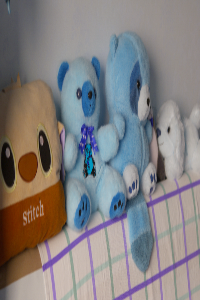

In [10]:
image_arrays_np_resized[0]

In [11]:

train_ratio = 0.8
train_size = int(train_ratio * noised_arrays_np_resized.shape[0])

train_noisy, test_noisy = noised_arrays_np_resized[:train_size], noised_arrays_np_resized[train_size:]
train_clean, test_clean = image_arrays_np_resized[:train_size], image_arrays_np_resized[train_size:]

In [13]:
!pip install pytorch_msssim

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import pytorch_msssim
import numpy as np


class AugmentedDataset(Dataset):
    def __init__(self, noisy_images, clean_images, transform=None):
        self.noisy_images = noisy_images
        self.clean_images = clean_images
        self.transform = transform

    def __len__(self):
        return len(self.noisy_images)

    def __getitem__(self, idx):
        noisy_img = self.noisy_images[idx]
        clean_img = self.clean_images[idx]

        if self.transform:
            seed = np.random.randint(2147483647)
            torch.manual_seed(seed)
            noisy_img = self.transform(noisy_img)
            torch.manual_seed(seed)
            clean_img = self.transform(clean_img)

        return noisy_img, clean_img


class ZeroDCE(nn.Module):
    def __init__(self):
        super(ZeroDCE, self).__init__()
        self.relu = nn.ReLU(inplace=True)

        self.e_conv1 = nn.Conv2d(3, 16, 3, 1, 1, bias=True)
        self.e_conv2 = nn.Conv2d(16, 16, 3, 1, 1, bias=True)
        self.e_conv3 = nn.Conv2d(16, 16, 3, 1, 1, bias=True)
        self.e_conv4 = nn.Conv2d(16, 16, 3, 1, 1, bias=True)
        self.e_conv5 = nn.Conv2d(16, 16, 3, 1, 1, bias=True)
        self.e_conv6 = nn.Conv2d(16, 16, 3, 1, 1, bias=True)
        self.e_conv7 = nn.Conv2d(16, 3, 3, 1, 1, bias=True)

    def forward(self, x):
        x1 = self.relu(self.e_conv1(x))
        x2 = self.relu(self.e_conv2(x1))
        x3 = self.relu(self.e_conv3(x2))
        x4 = self.relu(self.e_conv4(x3))
        x5 = self.relu(self.e_conv5(x4))
        x6 = self.relu(self.e_conv6(x5))
        x_r = torch.tanh(self.e_conv7(x6))

        x = x + x_r
        return x


mse_criterion = nn.MSELoss()
ssim_criterion = pytorch_msssim.MS_SSIM(data_range=1.0, win_size=7)


def mixed_loss(denoised, clean):
    mse_loss = mse_criterion(denoised, clean)
    ssim_loss = 1 - ssim_criterion(denoised, clean)
    return mse_loss + 0.1 * ssim_loss


min_size = min(train_clean.shape[0], train_noisy.shape[0])
high_images_resized = train_clean[:min_size]
low_images_resized =train_noisy[:min_size]

assert high_images_resized.size != 0, "High-quality images were not loaded properly."
assert low_images_resized.size != 0, "Low-quality images were not loaded properly."


assert high_images_resized.shape == low_images_resized.shape, "The arrays have different dimensions. Please check your image resizing."

high_images_resized = high_images_resized / 255.0
low_images_resized = low_images_resized / 255.0


noisy_images = low_images_resized.transpose(0, 3, 1, 2)
clean_images = high_images_resized.transpose(0, 3, 1, 2)

noisy_tensor = torch.from_numpy(noisy_images).float()
clean_tensor = torch.from_numpy(clean_images).float()


augmentation = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomCrop(128, padding=4)
])

augmented_dataset = AugmentedDataset(noisy_tensor, clean_tensor, transform=augmentation)
dataloader = DataLoader(augmented_dataset, batch_size=8, shuffle=True, num_workers=4)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ZeroDCE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)



for epoch in range(20):
    model.train()
    epoch_loss = 0
    for batch in dataloader:
        noisy, clean = batch
        noisy, clean = noisy.to(device), clean.to(device)
        optimizer.zero_grad()
        denoised = model(noisy)
        loss = mixed_loss(denoised, clean)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    scheduler.step()
    print(f'Epoch {epoch + 1}, Loss: {epoch_loss / len(dataloader):.4f}')

# Evaluate the model
model.eval()
psnr_values = []
with torch.no_grad():
    for batch in dataloader:
        noisy, clean = batch
        noisy, clean = noisy.to(device), clean.to(device)
        denoised = model(noisy)
        psnr = 10 * torch.log10(1 / mse_criterion(denoised, clean))
        psnr_values.append(psnr.item())
print(f'Average PSNR: {np.mean(psnr_values):.4f}')


Epoch 1, Loss: 0.1235
Epoch 2, Loss: 0.0588
Epoch 3, Loss: 0.0542
Epoch 4, Loss: 0.0537
Epoch 5, Loss: 0.0504
Epoch 6, Loss: 0.0470
Epoch 7, Loss: 0.0455
Epoch 8, Loss: 0.0455
Epoch 9, Loss: 0.0416
Epoch 10, Loss: 0.0415
Epoch 11, Loss: 0.0407
Epoch 12, Loss: 0.0396
Epoch 13, Loss: 0.0389
Epoch 14, Loss: 0.0394
Epoch 15, Loss: 0.0379
Epoch 16, Loss: 0.0386
Epoch 17, Loss: 0.0389
Epoch 18, Loss: 0.0372
Epoch 19, Loss: 0.0373
Epoch 20, Loss: 0.0379
Average PSNR: 16.2257


In [19]:
import torch

# Assuming 'model' is your trained ZeroDCE model instance
model = ZeroDCE()

# Define the file path including the filename
filepath = '/content/drive/MyDrive/Colab Notebooks/train/model.pth'

# Save the model state dictionary to the specified file
torch.save(model.state_dict(), filepath)